In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

In [2]:
univ = pd.read_excel('D:/data/univ.xlsx')
univ.head(1)

,Student Name,Admission Status,Northern,Southern,Fee no barrier,<2L for course,8-10L for course,2-4L for course,Management,Engineering,sciences,health,j+fd,Non Relevent,Fee(in lakhs)
0,Manikanta mk,1,0,1,0,0,0,0,0,0,1,0,0,0,12


In [3]:
x=univ.drop(['Student Name','Admission Status','Fee(in lakhs)','Non Relevent'],axis=1)
y=univ['Admission Status']
#plt.scatter(univ['Northern'],y,marker='+',color='Green')

In [5]:
# making logistic regression model
x1=sm.add_constant(x)
logit_model=sm.Logit(y,x1)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.536322
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       Admission Status   No. Observations:                92337
Model:                          Logit   Df Residuals:                    92325
Method:                           MLE   Df Model:                           11
Date:                Thu, 10 Jun 2021   Pseudo R-squ.:                 0.06173
Time:                        17:08:43   Log-Likelihood:                -49522.
converged:                       True   LL-Null:                       -52780.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.1001      1.024     -3.029      0.002      -5.106      -1.094
Northern   

In [ ]:
#A positive coefficient indicates that as the value of the independent variable increases,
#the mean of the dependent variable also tends to increase. 
#A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

In [ ]:
# to find correlation
#from scipy.stats.stats import pearsonr
#pearsonr(univ['Northern'],univ['Management'])

In [6]:
# to determine correlation matrix

from sklearn.datasets import load_iris
import seaborn as sns
#data = load_iris()

In [7]:
#df= pd.DataFrame(data= univ, columns= univ.drop(['Student Name','Admission Status','Fee(in lakhs)','Non Relevent'],axis=1) )
#univ.corr()
univ.drop(['Student Name','Admission Status','Fee(in lakhs)','Non Relevent'],axis=1).corr()

,Northern,Southern,Fee no barrier,<2L for course,8-10L for course,2-4L for course,Management,Engineering,sciences,health,j+fd
Northern,1.000000,-0.649325,-0.180539,0.226835,-0.256929,0.131508,0.023446,-0.021597,-0.033671,0.034992,-0.007344
Southern,-0.649325,1.000000,0.150462,-0.253207,0.428971,-0.211775,0.055796,-0.030825,-0.060075,-0.023834,0.044216
Fee no barrier,-0.180539,0.150462,1.000000,-0.171073,-0.149714,-0.172014,-0.012354,-0.004483,0.014593,0.015907,-0.003546
<2L for course,0.226835,-0.253207,-0.171073,1.000000,-0.316191,-0.363288,0.023974,-0.020694,-0.006824,0.010083,-0.010906
8-10L for course,-0.256929,0.428971,-0.149714,-0.316191,1.000000,-0.317930,0.044222,-0.029539,-0.055477,-0.008766,0.041126
2-4L for course,0.131508,-0.211775,-0.172014,-0.363288,-0.317930,1.000000,-0.045858,0.049793,0.049616,-0.020500,-0.034081
Management,0.023446,0.055796,-0.012354,0.023974,0.044222,-0.045858,1.000000,-0.561996,-0.261379,-0.274632,-0.239014
Engineering,-0.021597,-0.030825,-0.004483,-0.020694,-0.029539,0.049793,-0.561996,1.000000,-0.224879,-0.236281,-0.205637
sciences,-0.033671,-0.060075,0.014593,-0.006824,-0.055477,0.049616,-0.261379,-0.224879,1.000000,-0.109892,-0.095640
health,0.034992,-0.023834,0.015907,0.010083,-0.008766,-0.020500,-0.274632,-0.236281,-0.109892,1.000000,-0.100489


In [ ]:
#As can be seen, the diagonal elements are 1. Both the upper and lower triangular area have the same elements. 
#Therefore, we only need to show one of these in order to check correlation.

<AxesSubplot:>

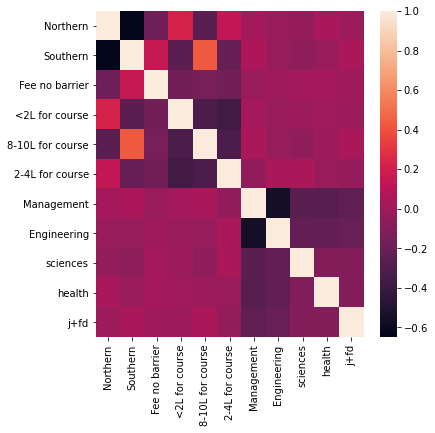

In [8]:
plt.figure(figsize= (6, 6))
sns.heatmap(univ.drop(['Student Name','Admission Status','Fee(in lakhs)','Non Relevent'],axis=1).corr())
#darker the color gets, the more negative linear relationship exists between the variables.

In [9]:
# create logistic regression object
Lreg=LogisticRegression(solver='lbfgs',max_iter=1000)

#perform logistic regression
Lreg.fit(x,y.ravel())   #ravel() will return the ID array with all the input array elements

LogisticRegression(max_iter=1000)

In [10]:
x1=np.transpose(x)
x1.shape

(11, 92337)

In [11]:
x2=Lreg.coef_[0]
x3=np.asmatrix(x2)
x3.shape

(1, 11)

In [12]:
y_prob=Lreg.predict_proba(x)[:,1]
y_prob

array([0.14843768, 0.17699863, 0.15800403, ..., 0.16158237, 0.18091471,
       0.15183844])

In [13]:
x4=np.asarray(-3.1+np.dot(x3,x1))
x5=x4[0]
len(x5)

92337

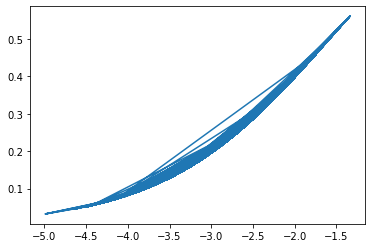

In [14]:
plt.plot(x5,y_prob)

In [15]:
univ['Admission Status'].value_counts()

0    68457
1    23880
Name: Admission Status, dtype: int64

In [17]:
##splitting the data set
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test= train_test_split(x,y,test_size=0.30,random_state=42)
len(x_train),len(x_test),len(y_train),len(y_test)

(64635, 27702, 64635, 27702)

In [18]:
# create logistic regression object
Lreg=LogisticRegression(solver='lbfgs',max_iter=1000)

#perform logistic regression
Lreg.fit(x_train,y_train.ravel())   #ravel() will return the ID array with all the input array elements

LogisticRegression(max_iter=1000)

In [19]:
# after giving x_test as input we are getting predicted value of admission status
y_predict_test= Lreg.predict(x_test)
y_predict_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
# Now predict admission status for train dataset
y_predict_train=Lreg.predict(x_train)
y_predict_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
# train dataset probability
y_prob_train=Lreg.predict_proba(x_train)[:,1]
y_prob_train

array([0.31919762, 0.2398018 , 0.18471769, ..., 0.17345231, 0.27926186,
       0.22567709])

In [22]:
# test dataset probability
y_prob_test=Lreg.predict_proba(x_test)[:,1]
y_prob_test

array([0.13342504, 0.56001788, 0.07267934, ..., 0.17345231, 0.45488134,
       0.1351877 ])

In [23]:
#to check accuracy of test dataset
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_predict_test)
score                        # percentage of correct predictions

0.7474550573965779

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict_test)

array([[20246,   251],
       [ 6745,   460]], dtype=int64)

In [25]:
# True Negatives i.e person will not take admission and my test data set is showing the same
# False Positive  i.e person will not take admission but my model is predicting that it will take admission
# False Negative i.e person will take admission and my model is predicting that it will not take admission
# True Positive i.e person will take admission and my model predicts it will take admission

tn,fp,fn,tp=confusion_matrix(y_test,y_predict_test).ravel()
print("True Negatives:",tn)
print("False Positive:",fp)
print("False Negatives:",fn)
print("True Positive:",tp)

True Negatives: 20246
False Positive: 251
False Negatives: 6745
True Positive: 460


In [26]:
print(classification_report(y_test,y_predict_test)) # recall tells about when it is actually yes, how often does it predict yes 
                                            #precision tells when it predicts yes, how often is it correct

              precision    recall  f1-score   support

           0       0.75      0.99      0.85     20497
           1       0.65      0.06      0.12      7205

    accuracy                           0.75     27702
   macro avg       0.70      0.53      0.48     27702
weighted avg       0.72      0.75      0.66     27702



In [ ]:
# precision=tp/(tp+fp)   
# recall = tp/(tp+fn)    .....Sensitivity(true positive rate tpr) or tn/(tn+fp)....Specificity (true negative rate tnr)
#accuracy= (tp+tn)/(tn+fp+fn+tp)

# in our model we are getting very high specificty(tnr) and very low sensitivity(tpr) 
# that means we have kept very high threshold,,,,,,so which threshold to choose...??

In [ ]:
Accuracy=(tp+tn)/(tn+fp+fn+tp)
print("Accuracy",Accuracy)

In [ ]:
# true negative rate

Specificity=tn/(tn+fp)
print("Specificity",Specificity)

In [ ]:
# true positive rate
Sensitivity=tp/(tp+fn)
print("Sensitivity",Sensitivity)

In [27]:
#ROC curve is used to choose most appropriate cut-off for a test
#the best cut-off has high tpr and low tnr
#measure usefulness of a test more area means more useful test

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
log_ROC_AUC1= roc_auc_score(y_train,y_predict_train)
fpr1,tpr1,thresholds1=roc_curve(y_train,y_prob_train)   
roc_auc1=auc(fpr1,tpr1)

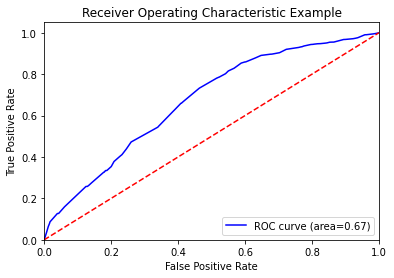

In [28]:
plt.figure()
plt.plot(fpr1,tpr1,color='blue',label='ROC curve (area=%0.2f)'%roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()

In [30]:
log_ROC_AUC2= roc_auc_score(y_test,y_predict_test)
fpr2,tpr2,thresholds2=roc_curve(y_test,y_prob_test)
roc_auc2=auc(fpr2,tpr2)
print("Area under ROC curve: %f" %roc_auc2)

Area under ROC curve: 0.672848


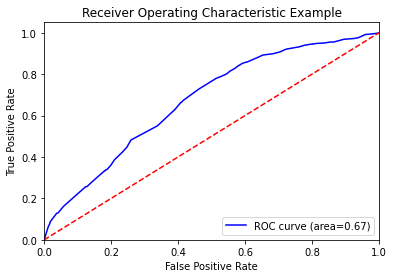

In [31]:
plt.figure()
plt.plot(fpr2,tpr2,color='blue',label='ROC curve (area=%0.2f)'%roc_auc2)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#The threshold defines the point at which the probability is mapped to class 0 versus class 1,
#where the default threshold is 0.5
# optimal threshold is that point where true positive rate and true negative rate becomes same. 

In [32]:
i=np.arange(len(tpr2))  # index
roc =pd.DataFrame({'fpr' : pd.Series(fpr2,index=i),'tpr' : pd.Series(tpr2,index=i),
                   '1-fpr': pd.Series(1-fpr2,index=i),'tf' : pd.Series(tpr2-(1-fpr2),index=i),
                  'thresholds': pd.Series(thresholds2,index=i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
27,0.38308,0.618321,0.61692,0.001401,0.271754


In [38]:
from sklearn.preprocessing import binarize
y_predict_class1=binarize(y_prob_test.reshape(1,-1),0.2717)[0]
y_predict_class1

C:\Users\mayan\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.2717 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([0., 1., 0., ..., 0., 1., 0.])

In [39]:
# converting the datatype from float to integer
y_predict_class1=y_predict_class1.astype(int)
y_predict_class1

array([0, 1, 0, ..., 0, 1, 0])

In [40]:
confusion_matrix_2=confusion_matrix(y_test,y_predict_class1)
print(confusion_matrix_2)

[[12645  7852]
 [ 2750  4455]]


In [41]:
tn1,fp1,fn1,tp1=confusion_matrix_2.ravel()
print("True Negatives:",tn1)
print("False Positive:",fp1)
print("False Negatives:",fn1)
print("True Positive:",tp1)

True Negatives: 12645
False Positive: 7852
False Negatives: 2750
True Positive: 4455


In [42]:
print(classification_report(y_test,y_predict_class1))

              precision    recall  f1-score   support

           0       0.82      0.62      0.70     20497
           1       0.36      0.62      0.46      7205

    accuracy                           0.62     27702
   macro avg       0.59      0.62      0.58     27702
weighted avg       0.70      0.62      0.64     27702



In [43]:
log_ROC_AUC3= roc_auc_score(y_test,y_predict_class1)
fpr3,tpr3,thresholds3=roc_curve(y_test,y_prob_test)   
roc_auc3=auc(fpr3,tpr3)

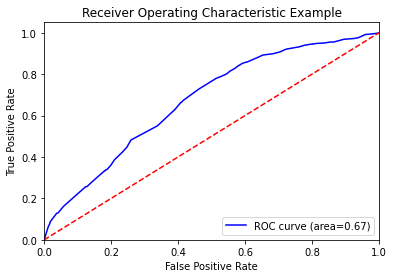

In [44]:
plt.figure()
plt.plot(fpr3,tpr3,color='blue',label='ROC curve (area=%0.2f)'%roc_auc3)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()